# Supervised Learning Project
#### -Author Manoj Mariappan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from sklearn import metrics
from sklearn.metrics import classification_report
from scipy.stats import zscore

## Loading the DataFrame

In [3]:
Bank_loan = pd.read_csv("Data/Bank_Personal_Loan_modelling.csv")

#### The data has been loaded to the dataframe and the data and column description has been displayed with samples below

#### EXPLORATORY DATA ANALYSIS

In [4]:
Bank_loan.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [5]:
Bank_loan.shape

(5000, 14)

In [6]:
Bank_loan.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

#### we can get to know all the data types are integer other than CCAvg(credit card average spending) which is a float.
#### From the above data we can understand the above data set has 5000 individual data with 14 attributes on it

In [7]:
Bank_loan = Bank_loan.drop(labels='ID',axis=1)

In [8]:
Bank_loan.shape

(5000, 13)

In [9]:
Bank_loan.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

#### the above data ID is a column which do not have any influence on the outcome and hence it can be removed

In [10]:
Bank_loan.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### Age seems to be uniformly distributed.
#### Experience has some negative values hence they should be replaced.
#### Family, Education, Personal Loan, Securities Account, CD Account, Online, CreditCard can be considered as a categorical values.

#### WE get the 5 point summary of the above numerical data

In [11]:
Bank_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [12]:
Bank_loan.isnull().values.any()

False

In [13]:
Bank_loan.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [14]:
Bank_loan.isna().apply(pd.value_counts) 

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


#### The data has no null values so we dont have to work on replacing the null values

In [15]:
Bank_loan = Bank_loan.rename(columns = {'Personal Loan': 'Personal_loan'},inplace  = False)
#Bank_loan['Personal_loan'] = Bank_loan.Personal_loan.astype('category')
Bank_loan.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

#### since the objective is to find the potential customers who can be turned to a personal loan customers we are clear with this, the target variable is Personal Loan.
#### Im replacing the Personal Loan attribute name to Persoal_loan

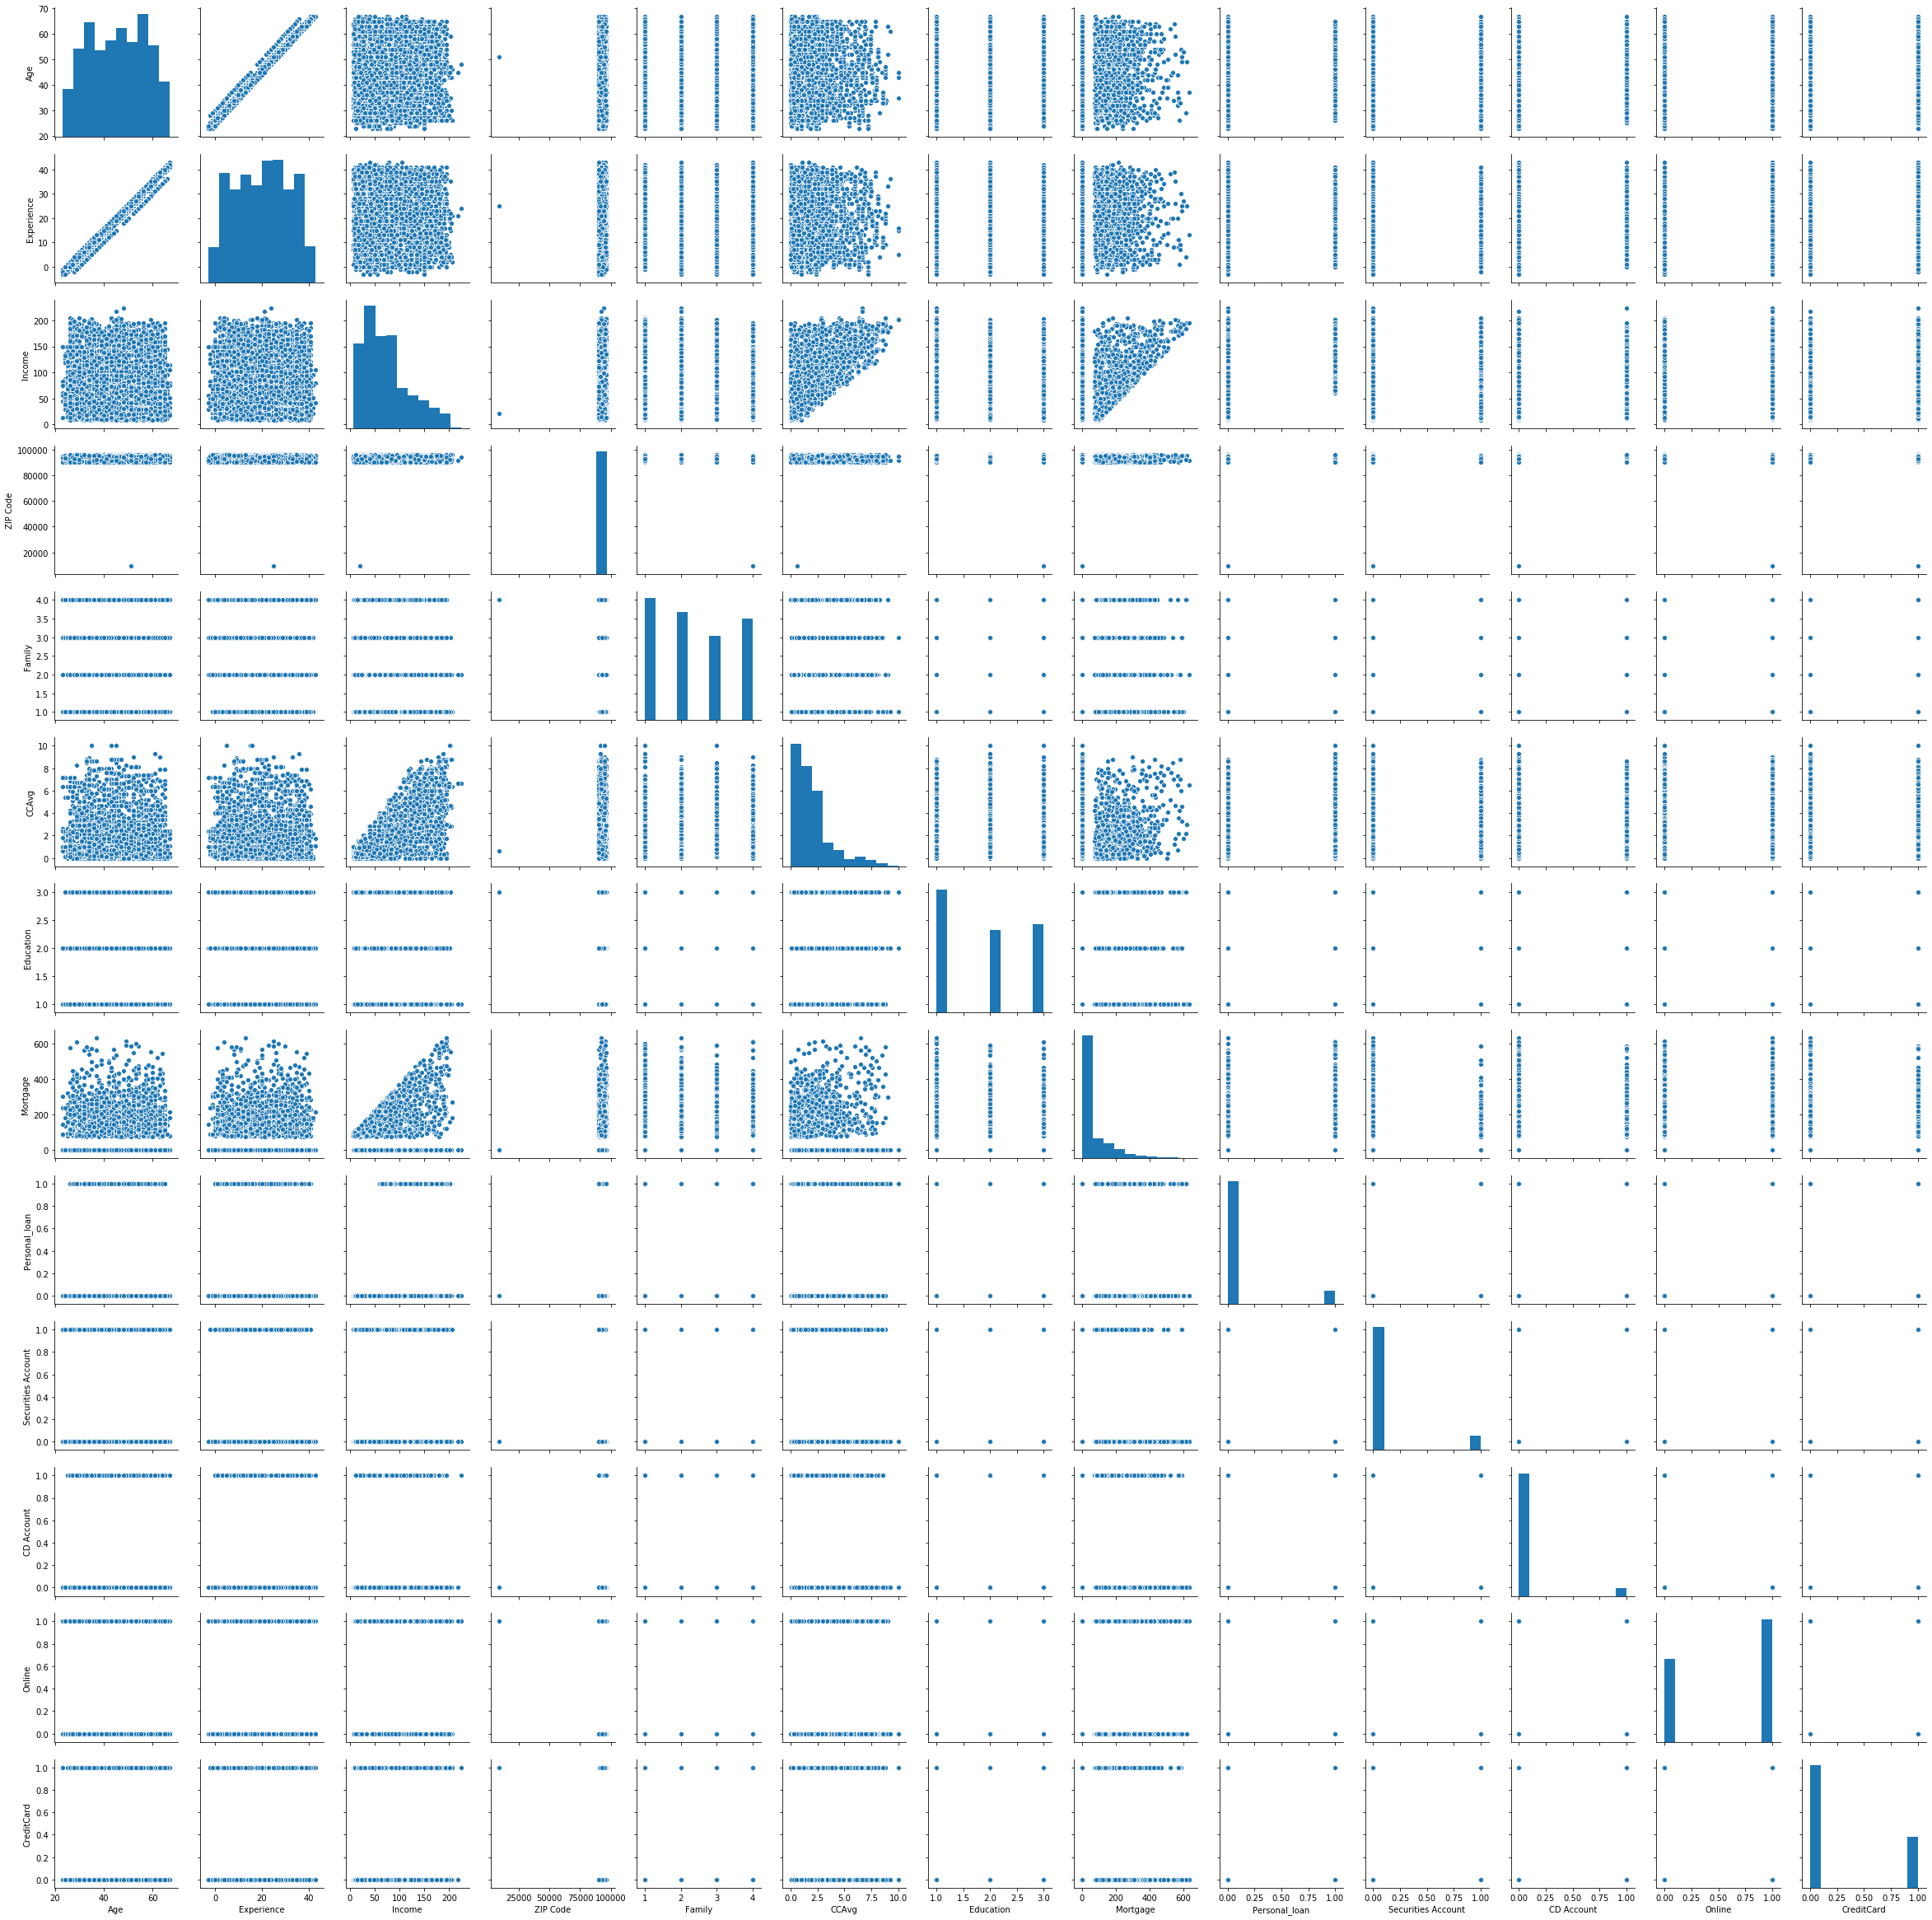

In [16]:
PL = sns.pairplot(data = Bank_loan)

#### we can see the distribution of Target variable(dependent variable) "Personal Loan" across every other independant variable

#### Family has 4 peak Values so the categories of the family will be with 1,2,3,4.
#### Mortgage is right skewed which shows us most customers have least mortgage
#### Most customers do not have security account
#### Most customers dont have CD account
#### more Customers use online banking
#### The customers who use Credit Card is very less

### UNIVARIATE ANALYSIS

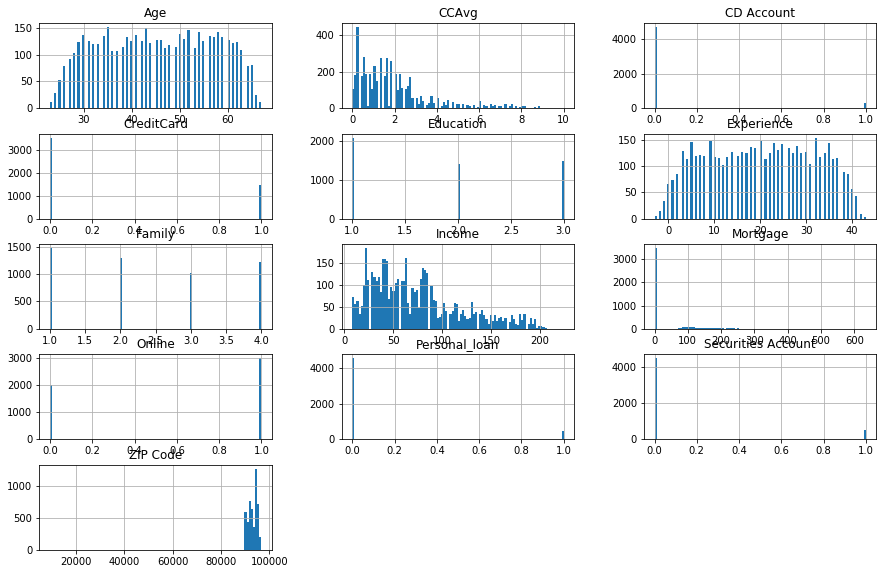

In [17]:
columns = list(Bank_loan)[0:]
Bank_loan[columns].hist(stacked=False,bins=100,figsize=(15,30),layout=(15,3));

#### Age and Experience seems to be evenly distributed.
#### CCAvg is right skewed 
#### income seems to beright skewed too
#### Mortgage has a lot of zeroes and other values seems to be very less comparitively, it is very highly skewed towards the right.

#### univariate distribution is done and can be seen from the above plot where histogram is used to analyse it. we can also find that the columns 'Securities Account, online, family, education,credit card' can be considered as a categorical value.

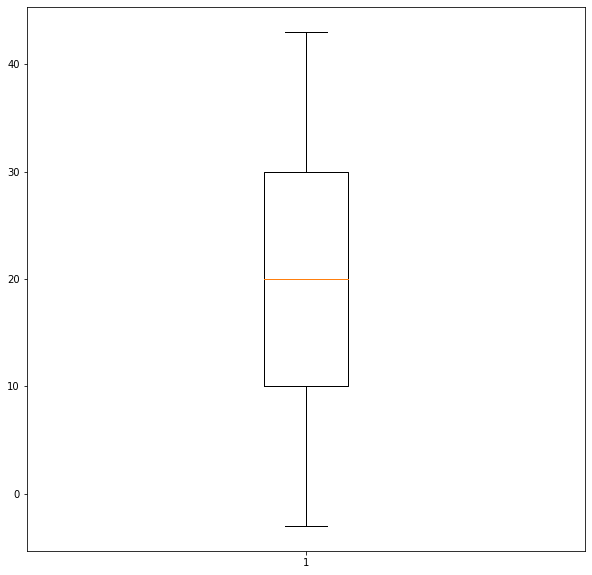

In [18]:
plt.figure(figsize = (10,10))
plt.boxplot(Bank_loan['Experience'])
plt.show()

#### from the histogram, boxplot and the 5 point summary we can identify there are some negative values in the experience as the experience cannot go beyond zero we will identify them and replace them with 0

In [19]:
print(Bank_loan.Experience.value_counts())

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64


#### there are 33,15,4 values of -1,-2,-3 respectively(total of 52 negative numbers) we will replace them to its median

In [20]:
print(Bank_loan['Experience'][Bank_loan['Experience'] < 0])

89     -1
226    -1
315    -2
451    -2
524    -1
536    -1
540    -1
576    -1
583    -1
597    -2
649    -1
670    -1
686    -1
793    -2
889    -2
909    -1
1173   -1
1428   -1
1522   -1
1905   -1
2102   -1
2430   -1
2466   -2
2545   -1
2618   -3
2717   -2
2848   -1
2876   -2
2962   -2
2980   -1
3076   -1
3130   -2
3157   -1
3279   -1
3284   -1
3292   -1
3394   -1
3425   -1
3626   -3
3796   -2
3824   -1
3887   -2
3946   -1
4015   -1
4088   -1
4116   -2
4285   -3
4411   -2
4481   -2
4514   -3
4582   -1
4957   -1
Name: Experience, dtype: int64


In [21]:
#Bank_loan['Experience'][Bank_loan['Experience'] < 0]= Bank_loan['Experience'].mode
Bank_loan['Experience'].replace([-1,-2,-3],[np.nan,np.nan,np.nan],inplace = True)

In [22]:
print(Bank_loan.Experience.value_counts())

32.0    154
20.0    148
9.0     147
5.0     146
23.0    144
35.0    143
25.0    142
28.0    138
18.0    137
19.0    135
26.0    134
24.0    131
3.0     129
14.0    127
16.0    127
30.0    126
27.0    125
17.0    125
34.0    125
22.0    124
29.0    124
7.0     121
8.0     119
6.0     119
15.0    119
10.0    118
33.0    117
13.0    117
11.0    116
37.0    116
36.0    114
4.0     113
21.0    113
31.0    104
12.0    102
38.0     88
2.0      85
39.0     85
1.0      74
0.0      66
40.0     57
41.0     43
42.0      8
43.0      3
Name: Experience, dtype: int64


In [23]:
Bank_loan['Experience'].isnull().sum()

52

In [24]:
Bank_loan['Experience'].fillna(Bank_loan['Experience'].median(),inplace=True)

#### The negative values un the expereince have been replaced with median

In [25]:
Bank_loan.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


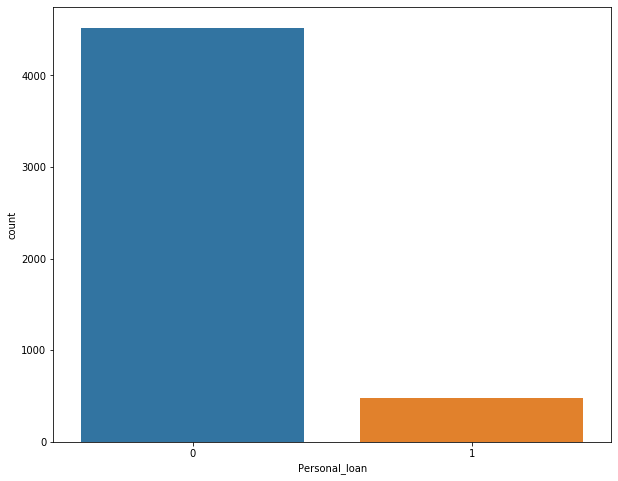

In [26]:
plt.figure(figsize =(10,8))
sns.countplot(x = 'Personal_loan',data = Bank_loan)
plt.show()

#### from the value counts we can understand personal loan has 2 values which is 0 and 1.
#### '0' represents those who have not got the personal loan and '1' represents the customers who got the personal loan
#### from the histogram of personal value we can understand that there are 480 customers who got personal loan and 4520 customers who did not get the personal loan.

In [27]:
print(Bank_loan.Personal_loan.value_counts())

0    4520
1     480
Name: Personal_loan, dtype: int64


In [28]:
Bank_loan.groupby(Bank_loan['Personal_loan']).mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal_loan,,,,,,,,,,,,
0,45.367257,20.378982,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


#### The Customers with more income has taken loan since average income of the customers who took loan is very high
#### The customers who spend a lot on credit cards has taken more loans
#### The customers who has higher qualification of education has taken more loan compared to those who have studied less

### MULTIVARIATE ANALYSIS

<Figure size 1080x1080 with 0 Axes>

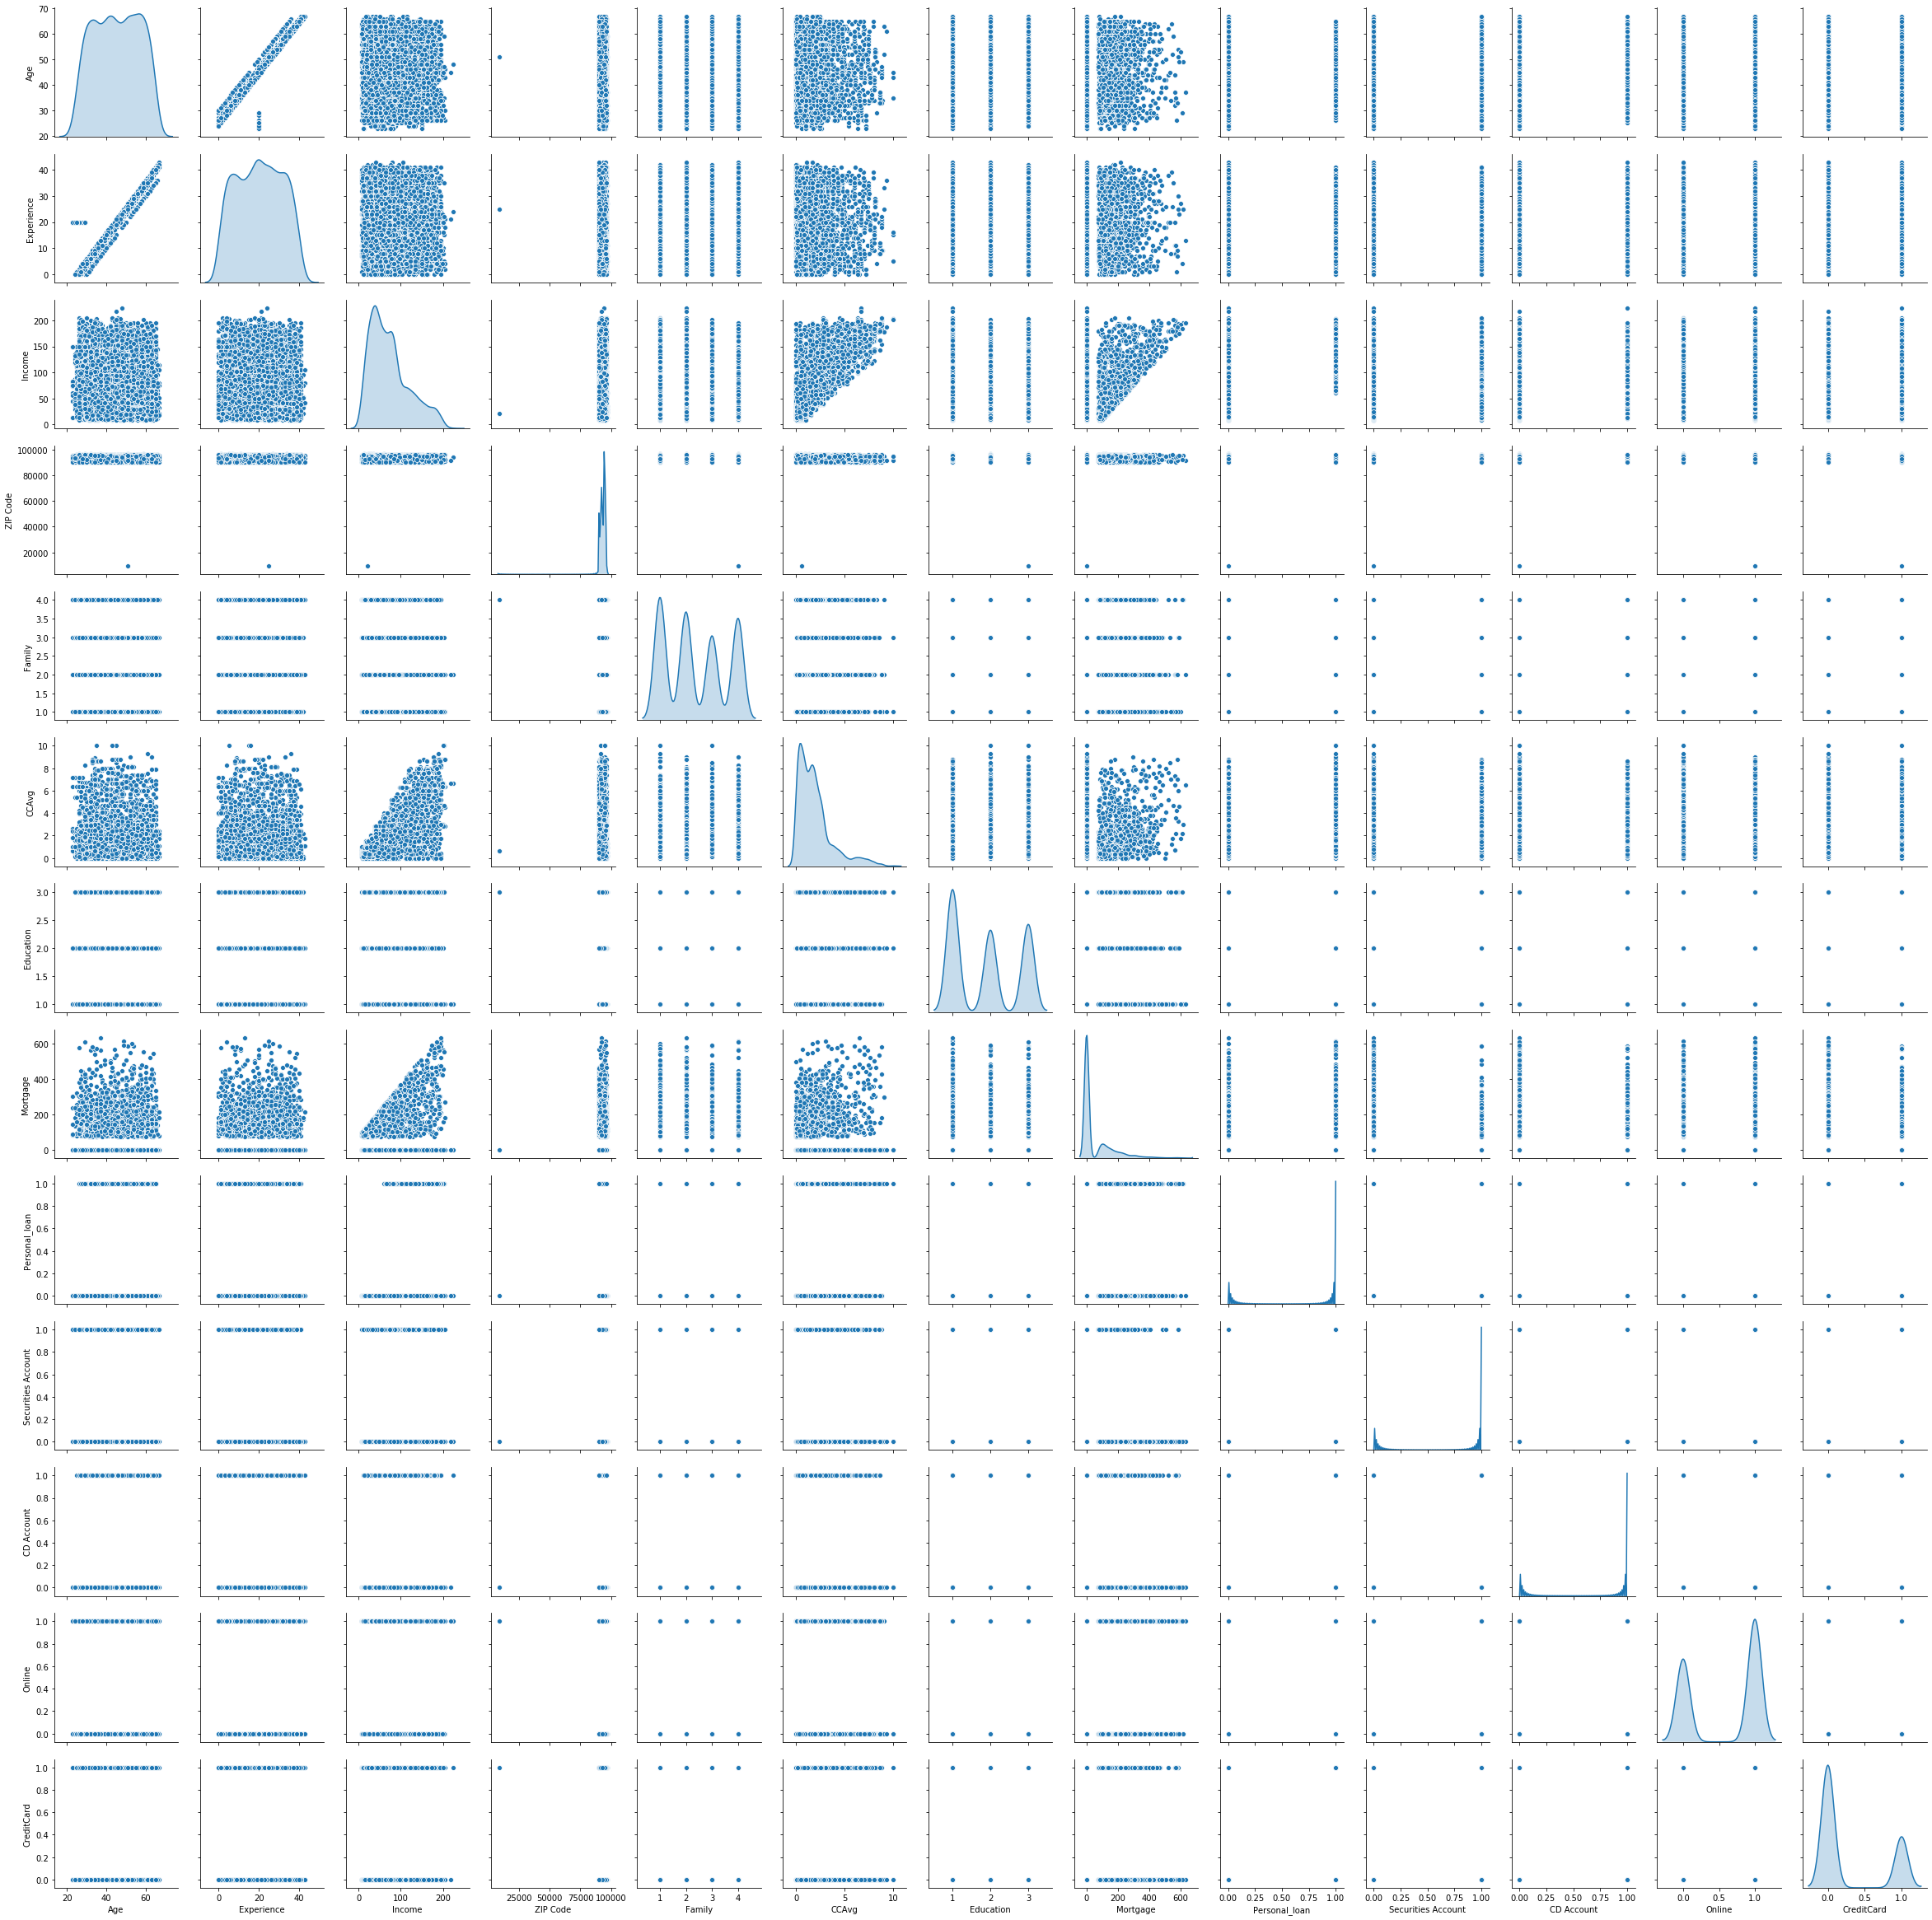

In [29]:
plt.figure(figsize=(15,15))
sns.pairplot(Bank_loan,diag_kind='kde')
plt.show()

In [30]:
Bank_loan.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048718,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.048718,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_loan,-0.007726,-0.014013,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000465,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


#### Income , CC AVGand CD Account has a good impact on the target variable with Income being the highest amont the three
#### Age, ZipCode, Onine and CreditCard has the least impact with Zip code being the lowest of them all

#### from the corelation table Zip code has the least effect on the personal loan as it is just 0.01 % and we can drop it
#### to reduce the noise in the data we can drop all the data which influences the personal loan with less than 1%

In [31]:
correlation = Bank_loan.corr()

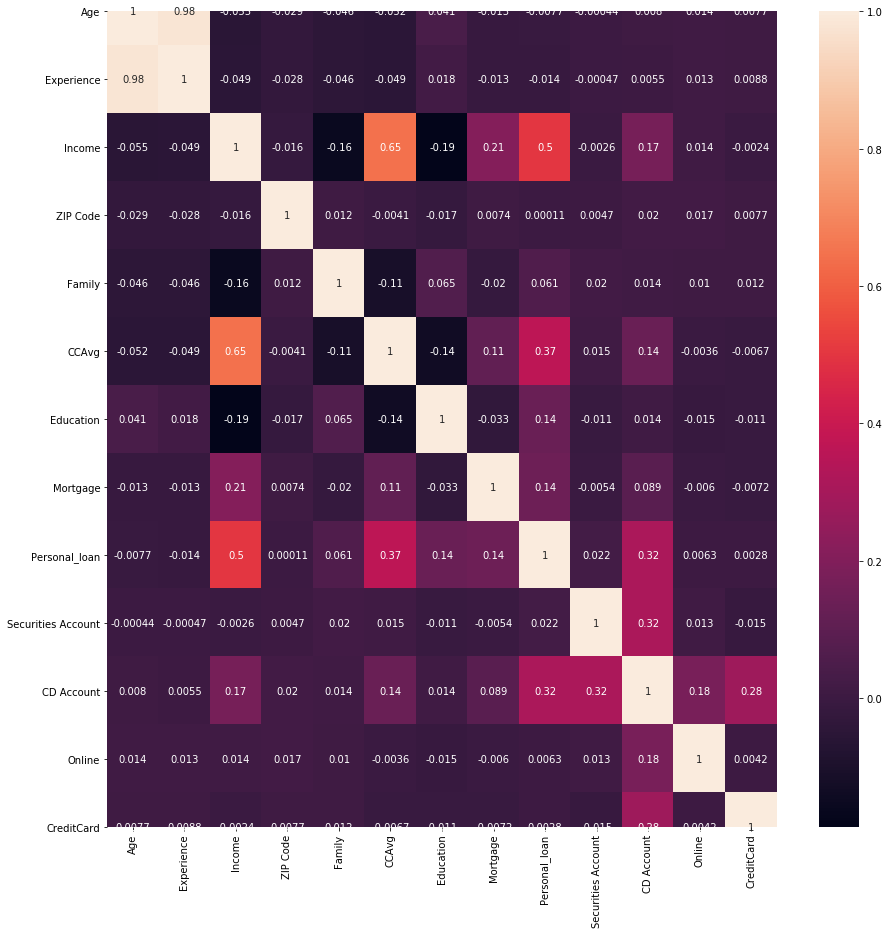

In [32]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(correlation, annot=True)
plt.show()

#### we can see from the above corellation heat map from the multivariate analysis which affects the Personal loan the most. the ones with the highest relation with the personal_loan are Income,CCAvg,CD Account, Education and Mortgage

In [33]:
X = Bank_loan.drop(["Personal_loan","ZIP Code"],axis = 1)#,"Age","Experience","Online","CreditCard"],axis = 1)
y = Bank_loan.pop("Personal_loan")

- we seperate the target and features. 
- personal loan is the target value
- rest of the columns are features

#### with zip code the accuracy drops to 90% while without zip code it goes upto 94%

In [34]:
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,1


In [35]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal_loan, dtype: int64

In [36]:
print(y.value_counts())

0    4520
1     480
Name: Personal_loan, dtype: int64


### Normalization of the independant values

In [37]:
X = preprocessing.scale(X)
X

array([[-1.77441684, -1.71771726, -0.53822878, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.11798886, -0.8641094 , ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.55299157, -0.47348406, -1.36379301, ..., -0.25354028,
        -1.21661774, -0.64531434],
       ...,
       [ 1.54088033,  1.65948715, -1.08136314, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [ 1.71536965,  1.74836095, -0.53822878, ..., -0.25354028,
         0.82195086, -0.64531434],
       [-1.51268285, -1.45109586,  0.20043396, ..., -0.25354028,
         0.82195086,  1.54963239]])

In [38]:
X = preprocessing.normalize(X)
X

array([[-0.39356198, -0.38098613, -0.11937803, ..., -0.05623471,
        -0.2698433 , -0.14312939],
       [-0.00817281, -0.03266205, -0.2392055 , ..., -0.07018582,
        -0.33678798, -0.17863796],
       [-0.19999527, -0.17124053, -0.49323022, ..., -0.09169553,
        -0.44000272, -0.23338478],
       ...,
       [ 0.4552328 ,  0.49027363, -0.3194745 , ..., -0.07490514,
        -0.35943369, -0.19064962],
       [ 0.5768013 ,  0.58789478, -0.18098202, ..., -0.08525414,
         0.27638493, -0.21699005],
       [-0.48316542, -0.46349394,  0.06402053, ..., -0.0809832 ,
         0.26253899,  0.49496746]])

### Train Test Split

#### Test Train Split Training data goes for 70% and testing data goes for 30% as the standard train test split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .30,random_state = 1)

In [40]:
X_train

array([[ 0.07549307,  0.07740262, -0.43868409, ..., -0.1320349 ,
         0.42804321, -0.3360571 ],
       [-0.30590018, -0.26869046, -0.36096401, ..., -0.12113969,
         0.3927221 , -0.30832646],
       [ 0.3447935 ,  0.37721899,  0.35964811, ..., -0.07334417,
         0.23777407,  0.44827789],
       ...,
       [ 0.02148945,  0.05533562, -0.37023623, ..., -0.09439258,
         0.30601079,  0.57692528],
       [ 0.02967304,  0.07640848,  0.17004937, ..., -0.13033906,
         0.4225455 , -0.33174084],
       [-0.24320776, -0.41618792, -0.02289508, ..., -0.09631283,
         0.31223605, -0.24513679]])

In [41]:
y_train

1334    0
4768    0
65      0
177     0
4489    0
       ..
2895    0
2763    0
905     0
3980    0
235     0
Name: Personal_loan, Length: 3500, dtype: int64

In [42]:
print("{0:0.2f}% data is in training set".format(len(X_train)/len(Bank_loan.index)*100))
print("{0:0.2f}% data is in training set".format(len(X_test)/len(Bank_loan.index)*100))

70.00% data is in training set
30.00% data is in training set


#### as required i have split the data to training set of 70% and testing set of 30%

### Logistic Regression

In [43]:
Logistic_model = LogisticRegression(solver = 'liblinear')
Logistic_model.fit(X_train,y_train)

y_predict  = Logistic_model.predict(X_test)

In [44]:
Logistic_model_score = Logistic_model.score(X_test,y_test)
print(Logistic_model_score)

0.9466666666666667


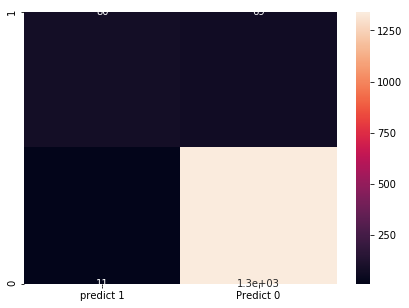

In [45]:
LR_CM = metrics.confusion_matrix(y_test,y_predict,labels=[1,0])
Ldf_cm = pd.DataFrame(LR_CM,index = (i for i in ["1","0"]),
                     columns = (i for i in ["predict 1", "Predict 0"]))

plt.figure(figsize = (7,5))
sns.heatmap(Ldf_cm,annot=True)
plt.show()

In [46]:
LR_CM

array([[  80,   69],
       [  11, 1340]], dtype=int64)

In [47]:
LOG_ROC_AUC = roc_auc_score(y_test,y_predict)
fpr_LR,tpr_LR, threshold_LR = roc_curve(y_test,Logistic_model.predict_proba(X_test)[:,1])
roc_auc1 = auc(fpr_LR,tpr_LR)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.959031


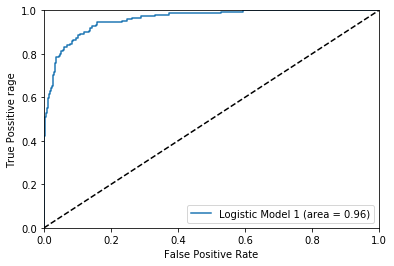

In [48]:
plt.figure()
plt.plot(fpr_LR,tpr_LR,label = "Logistic Model 1 (area = %0.2f)" % roc_auc1)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Possitive rage")
plt.legend(loc= "lower right")
plt.show()

In [49]:
LR_param = {
    'penalty' : ['l1','l2'],
    'C' : np.logspace(-4,4,20),
    #'solver' : ['newton-cg','sag','saga','lbfgs','liblinear'],
    'max_iter' : [100,1000,2500,5000]
}


In [50]:
LogReg_model = LogisticRegression()

In [51]:
LR_grid = GridSearchCV(LogReg_model,param_grid = LR_param,cv = 3,verbose = True,n_jobs = -1)

In [52]:
Best_model = LR_grid.fit(X_train,y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   54.3s finished
E:\anaconda03\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
print("Tuned Hyper parameters : (best parameters)",Best_model.best_params_)
print("Accuracy : ",Best_model.best_score_)

Tuned Hyper parameters : (best parameters) {'C': 4.281332398719396, 'max_iter': 100, 'penalty': 'l2'}
Accuracy :  0.9594285714285714


#### The hyperparameters of the best fit model is penalty = l2 , solver is liblinear max iteration is 100, C value is 4.281332398719396. building a logistic regression model with the best parameters for the better outcome. It has the accuracy of .9594285714285714.

In [54]:
final_LR_model = LogisticRegression(C = 4.281332398719396,max_iter = 100, penalty = 'l2',solver ='liblinear' )

In [55]:
final_LR_model.fit(X_train,y_train)
y_predict1 = final_LR_model.predict(X_test)

In [56]:
print("score :" , final_LR_model.score(X_test,y_test))

score : 0.9473333333333334


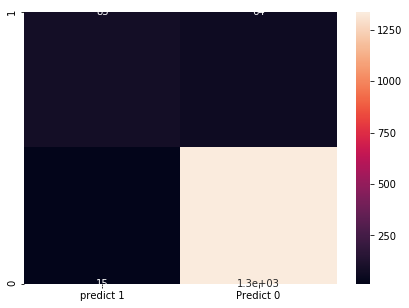

In [57]:
FLR_CM = metrics.confusion_matrix(y_test,y_predict1,labels=[1,0])
Ldf_cm = pd.DataFrame(FLR_CM,index = (i for i in ["1","0"]),
                     columns = (i for i in ["predict 1", "Predict 0"]))

plt.figure(figsize = (7,5))
sns.heatmap(Ldf_cm,annot=True)
plt.show()

In [58]:
LOG_ROC_AUC = roc_auc_score(y_test,y_predict)
Best_fpr_LR,Best_tpr_LR, Best_threshold_LR = roc_curve(y_test,final_LR_model.predict_proba(X_test)[:,1])
roc_auc1 = auc(Best_fpr_LR,Best_tpr_LR)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.959806


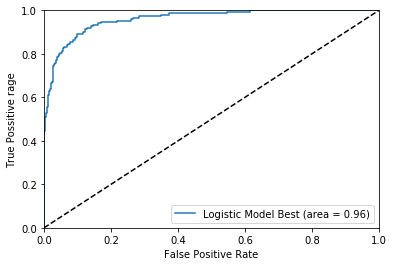

In [59]:
plt.figure()
plt.plot(Best_fpr_LR,Best_tpr_LR,label = "Logistic Model Best (area = %0.2f)" % roc_auc1)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Possitive rage")
plt.legend(loc= "lower right")
plt.show()

#### the confusion matrix for the best fit model is displayed above

In [60]:
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.57      0.68       149

    accuracy                           0.95      1500
   macro avg       0.90      0.78      0.83      1500
weighted avg       0.94      0.95      0.94      1500



In [61]:
print(final_LR_model.score(X_train,y_train))
print(final_LR_model.score(X_test,y_test))

0.96
0.9473333333333334


#### The F1 score of logistic regression model is .69 with the accuracy of .95

### KNN Classifier

#### KNN is a good algorithm for classification problems. this can be considered as a classification problem because the personal_loan is either 0 or 1 which the data can be grouped into 2 different kinds. here with the distance measurement the KNN can identifiy the data points which are similar to each other and group them in the same category.

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 1)

In [63]:
KNN = KNeighborsClassifier(n_neighbors = 5,weights = 'distance')

In [64]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [65]:
KNN_predicted_labels = KNN.predict(X_test)
KNN.score(X_test,y_test)

0.9593333333333334

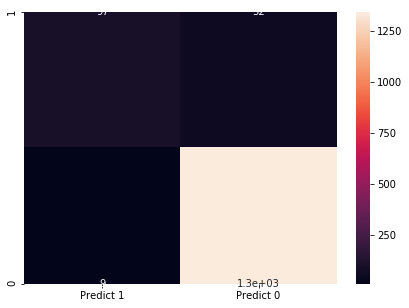

In [66]:

KNN_CM = metrics.confusion_matrix(y_test,KNN_predicted_labels,labels=[1,0])
df_cm = pd.DataFrame(KNN_CM,index = [i for i in["1","0"]],
                    columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot = True)

In [67]:
KNN_CM

array([[  97,   52],
       [   9, 1342]], dtype=int64)

In [68]:
scores = []
for k in range (1,50):
    KNN = KNeighborsClassifier(n_neighbors = k,weights = 'distance')
    KNN.fit(X_train,y_train)
    scores.append(KNN.score(X_test,y_test))

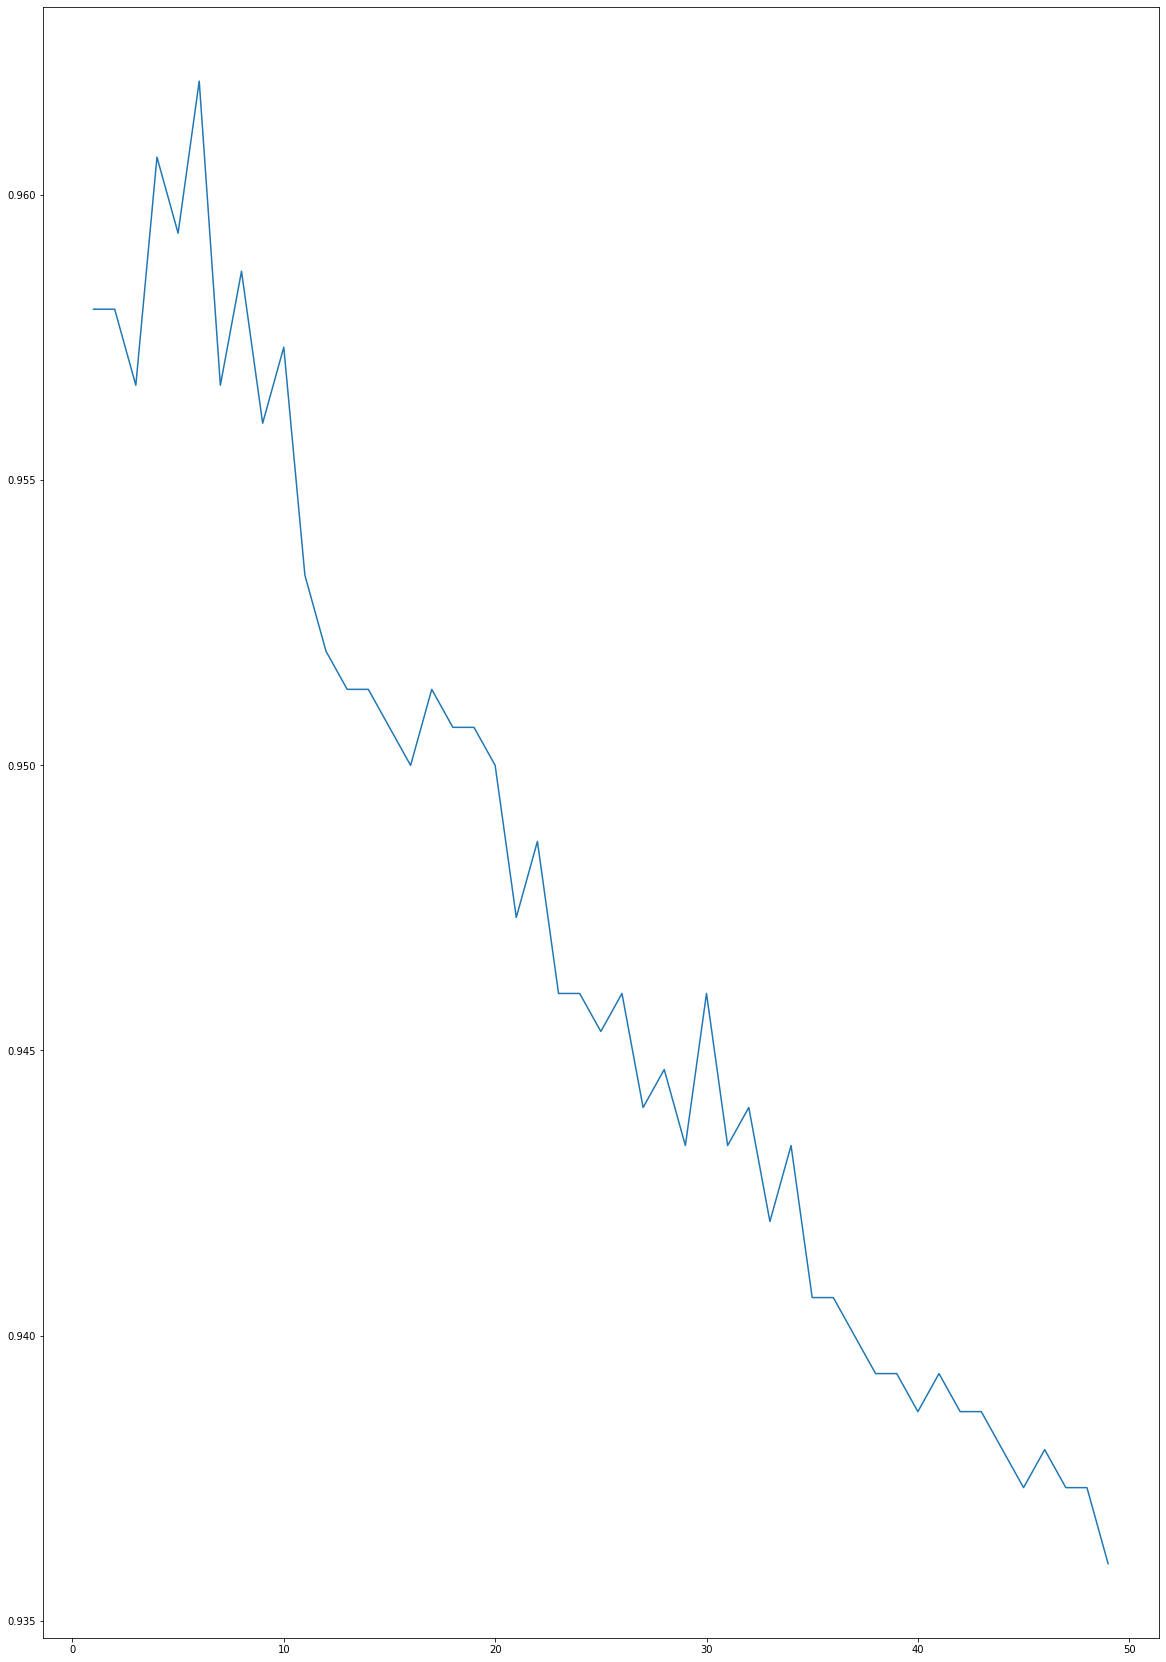

In [69]:
plt.figure (figsize = (20,30))
plt.plot(range(1,50),scores)
plt.show()

In [70]:
scores

[0.958,
 0.958,
 0.9566666666666667,
 0.9606666666666667,
 0.9593333333333334,
 0.962,
 0.9566666666666667,
 0.9586666666666667,
 0.956,
 0.9573333333333334,
 0.9533333333333334,
 0.952,
 0.9513333333333334,
 0.9513333333333334,
 0.9506666666666667,
 0.95,
 0.9513333333333334,
 0.9506666666666667,
 0.9506666666666667,
 0.95,
 0.9473333333333334,
 0.9486666666666667,
 0.946,
 0.946,
 0.9453333333333334,
 0.946,
 0.944,
 0.9446666666666667,
 0.9433333333333334,
 0.946,
 0.9433333333333334,
 0.944,
 0.942,
 0.9433333333333334,
 0.9406666666666667,
 0.9406666666666667,
 0.94,
 0.9393333333333334,
 0.9393333333333334,
 0.9386666666666666,
 0.9393333333333334,
 0.9386666666666666,
 0.9386666666666666,
 0.938,
 0.9373333333333334,
 0.938,
 0.9373333333333334,
 0.9373333333333334,
 0.936]

In [71]:
KNGSCV = KNeighborsClassifier()
params = {
    'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_kn = GridSearchCV(estimator = KNGSCV,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)
grid_kn.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 227 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 727 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1427 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1993 out of 2000 | elapsed:  1.7min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [72]:
print(grid_kn.best_estimator_)
print("Accuracy : ",grid_kn.best_score_)
print("Tuned Hyper parameters : (best parameters)",grid_kn.best_params_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
Accuracy :  0.9622857142857143
Tuned Hyper parameters : (best parameters) {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


#### From the GridsearchCV i have found the following hyperparameters as the best suited one for the model which are n-neighbors is 4 with weights as distance which gives the accuracy score of .9614285714285714. so training the model with the following hyperparameters is done below and auto algorithm is used

In [73]:
print(grid_kn.score(X_test, y_test))
print(grid_kn.score(X_train,y_train))

0.958
1.0


#### from the above GridSearch we found the optimal value of k to be 4 which gives the best performance

In [74]:
Best_KNN = KNeighborsClassifier(algorithm = 'auto',n_neighbors = 4, weights = 'distance')

In [75]:
Best_KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [76]:
Best_KNN_predicted_labels = Best_KNN.predict(X_test)
Best_KNN.score(X_test,y_test)

0.9606666666666667

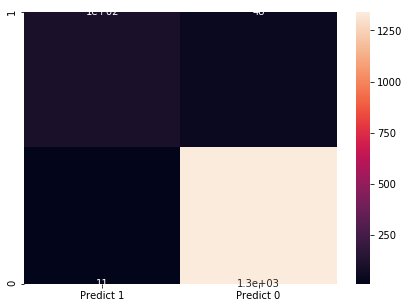

In [77]:
Best_KNN_CM = metrics.confusion_matrix(y_test,Best_KNN_predicted_labels,labels=[1,0])
df_cm = pd.DataFrame(Best_KNN_CM,index = [i for i in["1","0"]],
                    columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot = True)

In [78]:
KNN_ROC_AUC = roc_auc_score(y_test,Best_KNN_predicted_labels)
Best_fpr_KNN,Best_tpr_KNN, Best_threshold_KNN = roc_curve(y_test,Best_KNN.predict_proba(X_test)[:,1])
roc_auc2 = auc(Best_fpr_KNN,Best_tpr_KNN)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.919014


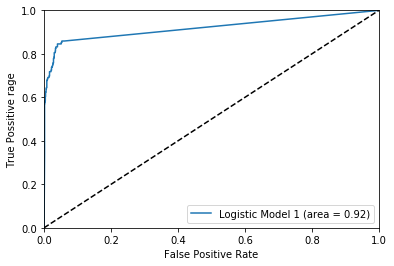

In [79]:
plt.figure()
plt.plot(Best_fpr_KNN,Best_tpr_KNN,label = "Logistic Model 1 (area = %0.2f)" % roc_auc2)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Possitive rage")
plt.legend(loc= "lower right")
plt.show()

In [80]:
print(classification_report(y_test,Best_KNN_predicted_labels))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1351
           1       0.90      0.68      0.77       149

    accuracy                           0.96      1500
   macro avg       0.93      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500



In [81]:

print(Best_KNN.score(X_test,y_test))

0.9606666666666667


#### The F1 score for the above model is .76 with an accuracy of .96 in the test and train data.

### NaiveBayes (Gaussian)

In [82]:
NaiveBayes_model = GaussianNB()

In [83]:
NaiveBayes_model.fit(X_train,y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [84]:
Bank_loan_predict  = NaiveBayes_model.predict(X_train)
print("model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,Bank_loan_predict)))

model Accuracy: 0.9003


In [85]:
Bank_loan_predict_test = NaiveBayes_model.predict(X_test)
print("model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,Bank_loan_predict_test)))

model Accuracy: 0.8780


confusion Matrix


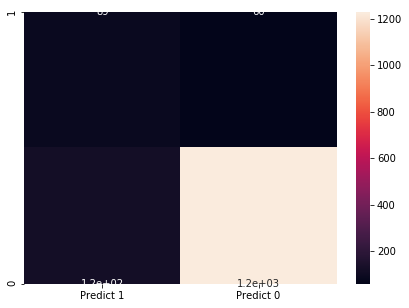

In [86]:
print("confusion Matrix")
NB_CM = metrics.confusion_matrix(y_test,Bank_loan_predict_test, labels=[1,0])

DF_CM = pd.DataFrame(NB_CM,index = [i for i in ["1","0"]],
                    columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(DF_CM,annot=True)

In [87]:
NB_CM

array([[  89,   60],
       [ 123, 1228]], dtype=int64)

#### The Total positive in the test set is 

In [88]:
print("Classification Report")
print(metrics.classification_report(y_test,Bank_loan_predict_test,labels =[1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.42      0.60      0.49       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.88      1500
   macro avg       0.69      0.75      0.71      1500
weighted avg       0.90      0.88      0.89      1500



#### The precision of the above nave bayess classifier is less for 1 which is .41 and recall

In [89]:
NB_ROC_AUC = roc_auc_score(y_test,Bank_loan_predict_test)
fpr,tpr, threshold = roc_curve(y_test,NaiveBayes_model.predict_proba(X_test)[:,1])

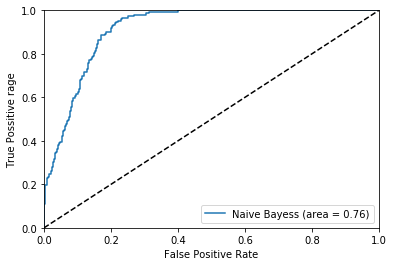

In [90]:
plt.figure()
plt.plot(fpr,tpr,label = "Naive Bayess (area = %0.2f)" % LOG_ROC_AUC)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc= "lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Possitive rage")
plt.show()

In [91]:
print(NaiveBayes_model.score(X_train,y_train))
print(NaiveBayes_model.score(X_test,y_test))

0.9002857142857142
0.878


### Comparing the Classification reports of all models

In [92]:
print("Classification Report of Logistic Regression model with the best hyperparameters")
print(classification_report(y_test,y_predict1))
print("Classification Report of KNN model with the best hyperparameters")
print(classification_report(y_test,Best_KNN_predicted_labels))
print("Classification Report of Naivebayes with GausianNB model")
print(metrics.classification_report(y_test,Bank_loan_predict_test,labels =[1,0]))

Classification Report of Logistic Regression model with the best hyperparameters
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.57      0.68       149

    accuracy                           0.95      1500
   macro avg       0.90      0.78      0.83      1500
weighted avg       0.94      0.95      0.94      1500

Classification Report of KNN model with the best hyperparameters
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1351
           1       0.90      0.68      0.77       149

    accuracy                           0.96      1500
   macro avg       0.93      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500

Classification Report of Naivebayes with GausianNB model
              precision    recall  f1-score   support

           1       0.42      0.60      0.49       149
           0       0.95      0.91 

#### In the Above models and their classification Reports we can understand that the F1 score of logistic regression , KNN and naive bayes are [.97,.68],[.98,.77],[.93,.49] for 0 and 1 respectively with the accuracy of .95,98 and .88. from this we can understand the KNN has the highest F1 score and accuracy. so hence i choose KNN

In [93]:
print("LOGISTIC MODEL")
print("False posive rate")
print(Best_fpr_LR)
print("True positive rate")
print(Best_tpr_LR)

LOGISTIC MODEL
False posive rate
[0.00000000e+00 0.00000000e+00 0.00000000e+00 7.40192450e-04
 7.40192450e-04 1.48038490e-03 1.48038490e-03 2.22057735e-03
 2.22057735e-03 3.70096225e-03 3.70096225e-03 4.44115470e-03
 4.44115470e-03 5.18134715e-03 5.18134715e-03 5.92153960e-03
 5.92153960e-03 7.40192450e-03 7.40192450e-03 8.14211695e-03
 8.14211695e-03 1.03626943e-02 1.03626943e-02 1.11028868e-02
 1.11028868e-02 1.18430792e-02 1.18430792e-02 1.25832717e-02
 1.25832717e-02 1.40636566e-02 1.40636566e-02 1.48038490e-02
 1.48038490e-02 1.77646188e-02 1.77646188e-02 2.07253886e-02
 2.07253886e-02 2.14655811e-02 2.14655811e-02 2.36861584e-02
 2.36861584e-02 2.51665433e-02 2.51665433e-02 2.59067358e-02
 2.59067358e-02 2.81273131e-02 2.81273131e-02 2.96076980e-02
 2.96076980e-02 3.25684678e-02 3.25684678e-02 3.47890452e-02
 3.47890452e-02 3.55292376e-02 3.55292376e-02 3.77498150e-02
 3.77498150e-02 3.84900074e-02 3.84900074e-02 4.21909697e-02
 4.21909697e-02 4.58919319e-02 4.58919319e-02 4.7372

In [94]:
print("KNN MODEL")
print("False posive rate")
print(Best_fpr_KNN)
print("True positive rate")
print(Best_tpr_KNN)

KNN MODEL
False posive rate
[0.         0.00148038 0.00148038 0.00222058 0.00222058 0.00296077
 0.00296077 0.00370096 0.00370096 0.00444115 0.00444115 0.00592154
 0.00592154 0.00666173 0.00666173 0.00814212 0.00814212 0.0096225
 0.0096225  0.01110289 0.01110289 0.01480385 0.01480385 0.01628423
 0.01628423 0.02072539 0.02072539 0.02220577 0.02220577 0.02442635
 0.02442635 0.02590674 0.02590674 0.02664693 0.02664693 0.02812731
 0.02812731 0.0296077  0.0296077  0.03034789 0.03034789 0.03330866
 0.03330866 0.03404885 0.03404885 0.03552924 0.03552924 0.03997039
 0.03997039 0.05107328 0.05107328 0.05329386 0.05329386 0.06069578
 1.        ]
True positive rate
[0.         0.34228188 0.5704698  0.5704698  0.57718121 0.57718121
 0.58389262 0.58389262 0.60402685 0.60402685 0.62416107 0.62416107
 0.63758389 0.63758389 0.6442953  0.6442953  0.67785235 0.67785235
 0.68456376 0.68456376 0.69127517 0.69127517 0.69798658 0.69798658
 0.71812081 0.71812081 0.72483221 0.72483221 0.73825503 0.73825503
 0.

In [95]:
print("NAIVE BAYES")
print("False posive rate")
print(fpr)
print("True positive rate")
print(tpr)

NAIVE BAYES
False posive rate
[0.00000000e+00 0.00000000e+00 0.00000000e+00 7.40192450e-04
 7.40192450e-04 1.48038490e-03 1.48038490e-03 2.22057735e-03
 2.22057735e-03 2.96076980e-03 2.96076980e-03 3.70096225e-03
 3.70096225e-03 7.40192450e-03 7.40192450e-03 8.14211695e-03
 8.14211695e-03 1.25832717e-02 1.25832717e-02 1.33234641e-02
 1.33234641e-02 1.48038490e-02 1.48038490e-02 2.07253886e-02
 2.07253886e-02 2.14655811e-02 2.14655811e-02 2.36861584e-02
 2.36861584e-02 2.44263509e-02 2.44263509e-02 2.51665433e-02
 2.51665433e-02 3.10880829e-02 3.10880829e-02 3.18282754e-02
 3.18282754e-02 3.33086603e-02 3.33086603e-02 3.55292376e-02
 3.55292376e-02 3.92301999e-02 3.92301999e-02 3.99703923e-02
 3.99703923e-02 4.14507772e-02 4.14507772e-02 4.21909697e-02
 4.21909697e-02 4.36713546e-02 4.36713546e-02 4.88527017e-02
 4.88527017e-02 5.32938564e-02 5.32938564e-02 5.40340489e-02
 5.40340489e-02 5.47742413e-02 5.47742413e-02 5.69948187e-02
 5.69948187e-02 5.77350111e-02 5.77350111e-02 5.8475203

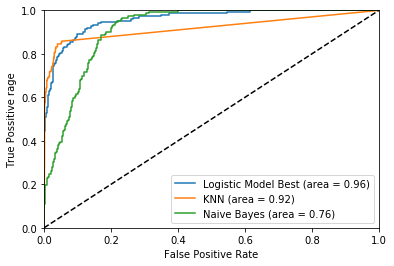

In [96]:
plt.figure()
plt.plot(Best_fpr_LR,Best_tpr_LR,label = "Logistic Model Best (area = %0.2f)" % roc_auc1)
plt.plot(Best_fpr_KNN,Best_tpr_KNN,label = "KNN (area = %0.2f)" % roc_auc2)
plt.plot(fpr,tpr,label = "Naive Bayes (area = %0.2f)" % LOG_ROC_AUC)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Possitive rage")
plt.legend(loc= "lower right")
plt.show()

### Model Selection

#### The model that i have selected is 'K-Nearest Neighbor model'.
#### It has the hyperparameters number of neighbours and weights. 
#### The initialization i have done with' 5 neighbours' and the 'weight as distance'. 5 neighbours for a group dosent sound big eventhought there might be a lot of groups it is not a cumbersome procedure to group 5 points in a single group so it might not even give the model to confuse between the points which are nearby and the weight i used is distance because distance is a convenient way to measure the weight of a data and assign it to a category. 

#### The final model that got the best outcome came with the 'distance' as its 'weight' and '4' as its 'n_neighbours'

#### the initialization of the wight was done based on log(5000) which is the number of samples.


#### Naive bayess accuracy is very less

#### The above model has 96% accuracy